In [1]:
import numpy as np

# data thật
X = np.array([0, 1, 2, 3, 4], dtype=float)
y = 2 * X + 1


Khởi tạo tham số, learning rate, và loss function

In [10]:
# khởi tạo ngẫu nhiên
w, b = 0.0, 0.0
alpha = 0.5   # learning rate
n = len(X)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


Vòng lặp Gradient Descent

In [11]:
for epoch in range(50):  # 50 lần cập nhật
    y_pred = w * X + b
    dw = -(2/n) * np.sum(X * (y - y_pred))
    db = -(2/n) * np.sum(y - y_pred)

    w -= alpha * dw
    b -= alpha * db

    if epoch % 10 == 0:  # in mỗi 10 vòng
        print(f"Epoch {epoch:2d} | w={w:.4f}, b={b:.4f}, loss={mse(y, y_pred):.4f}")


Epoch  0 | w=14.0000, b=5.0000, loss=33.0000
Epoch 10 | w=433257990.0000, b=151978697.0000, loss=43458982300792608.0000
Epoch 20 | w=15728423050419014.0000, b=5517232899660105.0000, loss=57273900248716159451530549788672.0000
Epoch 30 | w=570983798350720587005952.0000, b=200290301661841580883968.0000, loss=75480360469464285670888494997380095236607311872.0000
Epoch 40 | w=20728238103331715248452498620416.0000, b=7271073320515957168421753323520.0000, loss=99474364271673221762180570728896655311726245117351388283666432.0000


Chuẩn bị import và decorator đo thời gian

In [1]:
import time
import numpy as np

def timer(func):
    """Decorator đo thời gian chạy của hàm."""
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"⏱️ Training finished in {end - start:.4f} seconds")
        return result
    return wrapper


✅ Hàm tính loss (Mean Squared Error)

In [2]:
def compute_loss(y: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Tính Mean Squared Error (MSE) giữa giá trị thật và dự đoán.
    """
    m = len(y)
    loss = np.sum((y - y_pred) ** 2) / m
    return loss


In [ ]:
def compute_loss(y: np.ndarray, y_pred: np.ndarray) -> float: 
    m = len(y)
    loss = np.sum((y-y_pred) ** 2) / m 
    return loss

In [4]:
#Hàm tính gradient cho w và b
def compute_gradient(X: np.ndarray, y: np.ndarray, w: float, b: float) -> tuple[float, float]:
    """
    Tính gradient của hàm mất mát MSE theo w và b.
    """
    m = len(y)
    y_pred = w * X + b
    dw = (-2 / m) * np.sum(X * (y - y_pred))
    db = (-2 / m) * np.sum(y - y_pred)
    return dw, db


In [5]:
#✅ Hàm cập nhật trọng số
def update_weights(w: float, b: float, dw: float, db: float, lr: float) -> tuple[float, float]:
    """
    Cập nhật w và b dựa trên gradient descent.
    """
    w = w - lr * dw
    b = b - lr * db
    return w, b


Training Loop chính

In [33]:
@timer
def train(X: np.ndarray, y: np.ndarray, lr: float = 0.01, epochs: int = 500) -> tuple[float, float]:
    """
    Huấn luyện mô hình Linear Regression đơn giản bằng Gradient Descent.
    """
    w, b = 0.0, 0.0  # Khởi tạo trọng số
    losses = []

    for epoch in range(epochs):
        y_pred = w * X + b
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        dw, db = compute_gradient(X, y, w, b)
        w, b = update_weights(w, b, dw, db, lr)

        if epoch % 50 == 0:
            print(f"Epoch {epoch:03d} | Loss: {loss:.4f} | w={w:.3f}, b={b:.3f}")

    return w, b, losses


Chạy thử

In [37]:
# Tạo dữ liệu giả lập
X = np.linspace(0, 10, 50)
y = 2.5 * X + 5 + np.random.randn(50) * 2  # y ≈ 2.5x + 5 + noise

# Huấn luyện
w_final, b_final, losses = train(X, y, lr=0.02, epochs=500)

print(f"\n✅ Final parameters: w = {w_final:.3f}, b = {b_final:.3f}")


Epoch 000 | Loss: 365.7016 | w=4.367, b=0.703
Epoch 050 | Loss: 6.6938 | w=2.887, b=2.414
Epoch 100 | Loss: 5.3181 | w=2.717, b=3.553
Epoch 150 | Loss: 4.8185 | w=2.614, b=4.240
Epoch 200 | Loss: 4.6371 | w=2.552, b=4.653
Epoch 250 | Loss: 4.5713 | w=2.515, b=4.903
Epoch 300 | Loss: 4.5473 | w=2.492, b=5.053
Epoch 350 | Loss: 4.5387 | w=2.479, b=5.143
Epoch 400 | Loss: 4.5355 | w=2.471, b=5.198
Epoch 450 | Loss: 4.5344 | w=2.466, b=5.231
⏱️ Training finished in 0.0199 seconds

✅ Final parameters: w = 2.463, b = 5.250


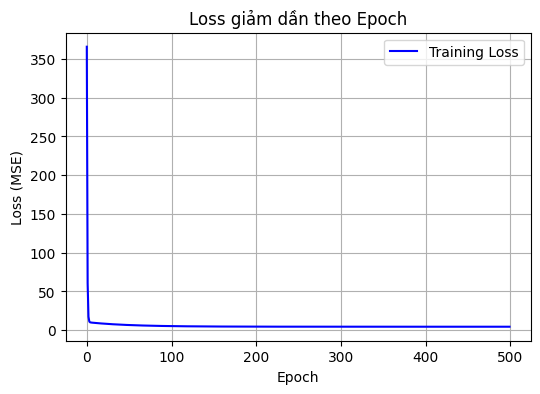

In [38]:
import matplotlib.pyplot as plt

# ========== 1️⃣ Vẽ biểu đồ Loss theo Epoch ==========
plt.figure(figsize=(6,4))
plt.plot(range(len(losses)), losses, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss giảm dần theo Epoch")
plt.legend()
plt.grid(True)
plt.show()

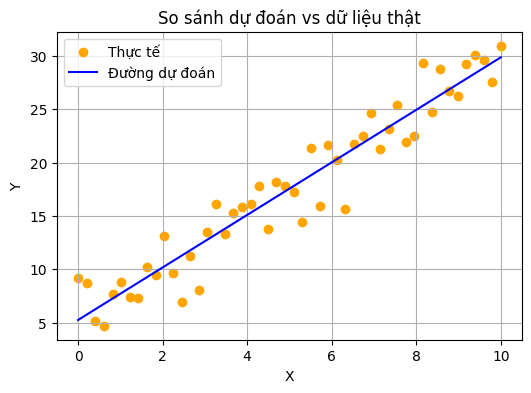

In [39]:
# ========== 2️⃣ Vẽ dữ liệu thật & đường dự đoán ==========
y_pred_final = w_final * X + b_final

plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Thực tế", color="orange")
plt.plot(X, y_pred_final, label="Đường dự đoán", color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("So sánh dự đoán vs dữ liệu thật")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
import numpy as np

# Hai vector
v = np.array([2, 3])
u = np.array([4, 1])

# Norm
norm_v = np.linalg.norm(v)
norm_u = np.linalg.norm(u)

# Dot product
dot = np.dot(v, u)

# Góc giữa 2 vector (radians -> degrees)
cos_theta = dot / (norm_v * norm_u)
theta = np.degrees(np.arccos(cos_theta))

print(f"||v|| = {norm_v:.2f}, ||u|| = {norm_u:.2f}")
print(f"v·u = {dot}")
print(f"Góc giữa v và u = {theta:.2f}°")


||v|| = 3.61, ||u|| = 4.12
v·u = 11
Góc giữa v và u = 42.27°


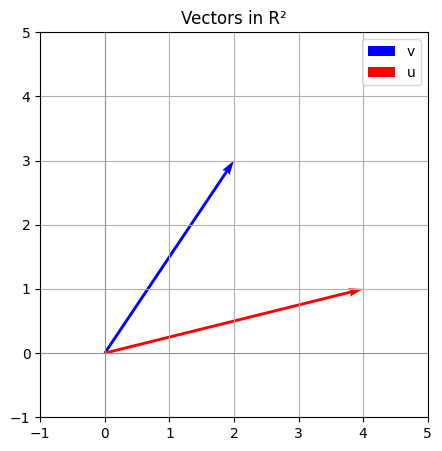

In [41]:
import matplotlib.pyplot as plt

v = np.array([2, 3])
u = np.array([4, 1])

plt.figure(figsize=(5,5))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# Vẽ vector từ gốc (0,0)
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v')
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='red', label='u')

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.legend()
plt.grid(True)
plt.title("Vectors in R²")
plt.show()


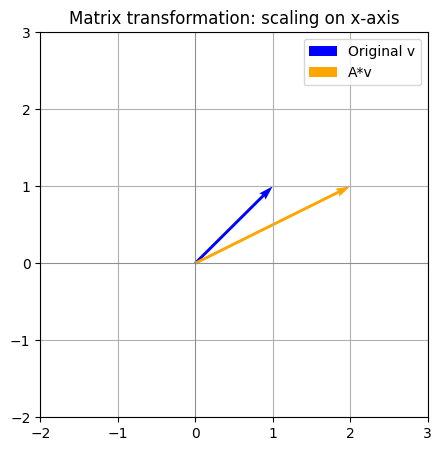

In [42]:
A = np.array([[2, 0], [0, 1]])  # Scale theo trục x
v = np.array([1, 1])
v_transformed = A @ v

plt.figure(figsize=(5,5))
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# Vẽ vector trước và sau biến đổi
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original v')
plt.quiver(0, 0, v_transformed[0], v_transformed[1], angles='xy', scale_units='xy', scale=1, color='orange', label='A*v')

plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.legend()
plt.grid(True)
plt.title("Matrix transformation: scaling on x-axis")
plt.show()


In [55]:
import numpy as np 
import matplotlib.pyplot as plt 

#Vector 
v = np.array([3,4])
u = np.array([6,8])

In [56]:
v_norm = np.linalg.norm(v)
u_norm= np.linalg.norm(u)

In [57]:
# Dot product
dot = np.dot(v, u)
dot

np.int64(50)

In [61]:
# Góc giữa hai vector (đơn vị độ)
cos_theta = dot / (v_norm * u_norm)
theta = np.degrees(np.arccos(cos_theta))
print(f"v·u = {dot:.2f}, góc = {theta:.2f}°")
cos_theta

v·u = 50.00, góc = 0.00°


np.float64(1.0)

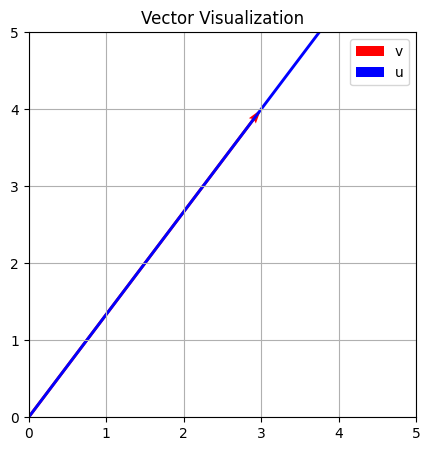

In [59]:
# Vẽ 2 vector
plt.figure(figsize=(5,5))
plt.quiver(0,0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='v')
plt.quiver(0,0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='b', label='u')
plt.xlim(0,5); plt.ylim(0,5)
plt.grid(); plt.legend()
plt.title("Vector Visualization")
plt.show()

In [62]:
# Vector gốc
v = np.array([1, 1])

# Các ma trận biến đổi
scale = np.array([[2, 0], [0, 1]])       # scale theo trục x
rotate = np.array([[0, -1], [1, 0]])     # xoay 90 độ
shear = np.array([[1, 0.5], [0, 1]])     # shear theo x

# Áp biến đổi
v_scale = scale @ v
v_rotate = rotate @ v
v_shear = shear @ v


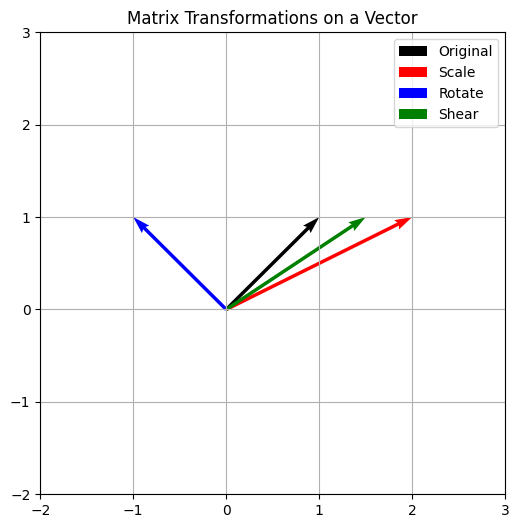

In [63]:
# Vẽ
plt.figure(figsize=(6,6))
plt.quiver(0,0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='k', label='Original')
plt.quiver(0,0, v_scale[0], v_scale[1], angles='xy', scale_units='xy', scale=1, color='r', label='Scale')
plt.quiver(0,0, v_rotate[0], v_rotate[1], angles='xy', scale_units='xy', scale=1, color='b', label='Rotate')
plt.quiver(0,0, v_shear[0], v_shear[1], angles='xy', scale_units='xy', scale=1, color='g', label='Shear')
plt.xlim(-2,3); plt.ylim(-2,3)
plt.legend(); plt.grid()
plt.title("Matrix Transformations on a Vector")
plt.show()

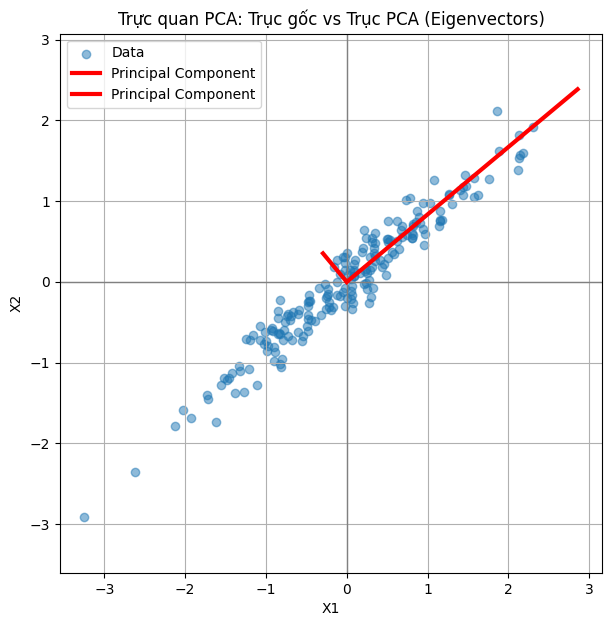

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1️⃣ Tạo dữ liệu 2D có tương quan
np.random.seed(42)
X = np.random.randn(200, 2)
X[:, 1] = 0.8 * X[:, 0] + 0.2 * np.random.randn(200)

# 2️⃣ Chuẩn hóa (zero mean)
X_centered = X - np.mean(X, axis=0)

# 3️⃣ PCA
pca = PCA(n_components=2)
pca.fit(X_centered)

# 4️⃣ Vẽ dữ liệu và trục PCA
plt.figure(figsize=(7,7))
plt.scatter(X_centered[:,0], X_centered[:,1], alpha=0.5, label="Data")
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Vẽ eigenvectors (principal components)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], color='red', lw=3, label='Principal Component')

plt.title("Trực quan PCA: Trục gốc vs Trục PCA (Eigenvectors)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [66]:
import numpy as np
from scipy.linalg import lu

A = np.array([[4, 3], [6, 3]])
P, L, U = lu(A)

print("L =\n", L)
print("U =\n", U)
print("Check A =", np.allclose(A, P @ L @ U))


L =
 [[1.         0.        ]
 [0.66666667 1.        ]]
U =
 [[6. 3.]
 [0. 1.]]
Check A = True


In [67]:
P

array([[0., 1.],
       [1., 0.]])

In [68]:
Q, R = np.linalg.qr(A)
print("Q =\n", Q)
print("R =\n", R)
print("Check A =", np.allclose(A, Q @ R))


Q =
 [[-0.5547002  -0.83205029]
 [-0.83205029  0.5547002 ]]
R =
 [[-7.21110255 -4.16025147]
 [ 0.         -0.83205029]]
Check A = True


In [69]:
U, S, Vt = np.linalg.svd(A)
print("U =\n", U)
print("S =\n", S)
print("Vt =\n", Vt)


U =
 [[-0.59581566 -0.80312122]
 [-0.80312122  0.59581566]]
S =
 [8.33557912 0.71980602]
Vt =
 [[-0.86400595 -0.50348159]
 [ 0.50348159 -0.86400595]]


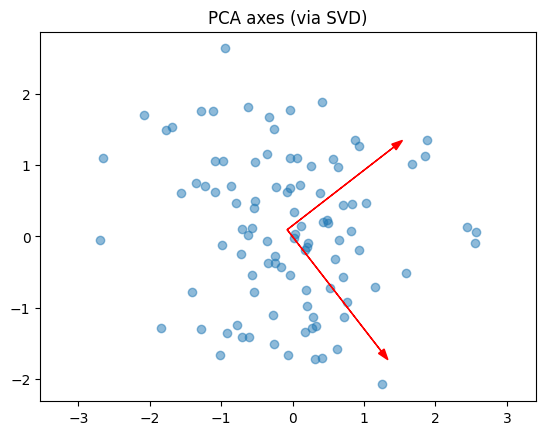

In [70]:
import matplotlib.pyplot as plt

X = np.random.randn(100, 2)
U, S, Vt = np.linalg.svd(X - X.mean(axis=0))

plt.scatter(X[:,0], X[:,1], alpha=0.5)
origin = X.mean(axis=0)

for i in range(2):
    plt.arrow(origin[0], origin[1],
              Vt[i,0]*S[i]/5, Vt[i,1]*S[i]/5,
              color='red', head_width=0.1)
plt.axis('equal')
plt.title("PCA axes (via SVD)")
plt.show()


LinearRegressionScratch

In [74]:
import numpy as np
import logging 
from time import time 

# setup logging để theo dõi trong console
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')

class LinearRegressionScratch:
    def __init__(self, lr = 0.01, epochs = 1000, log_interval = 100):
        self.lr = lr 
        self.epochs = epochs 
        self.log_interval = log_interval
        self.w = None
        self.b = None 

    def compute_loss(self, y, y_pred):
         """Tính Mean Squared Error"""
         return np.mean((y-y_pred)**2)
    
    def compute_gradients(self, X, y, y_pred):
        """Tính gradient cho w và b"""
        n = len(y)

        dw = -(2/n) * np.dot(X.T, (y - y_pred))
        db = -(2/n) * np.sum(y - y_pred)
        return dw, db

    def fit(self,X,y):
        """Huấn luyện mô hình bằng Gradient Descent"""
        n_samples, n_features = X.shape 
        self.w = np.zeros((n_features, 1))
        self.b = 0.0 

        start_time = time()
        for epoch in range(1, self.epochs + 1):
            #forward 
            y_pred = np.dot(X, self.w) + self.b  

            #loss
            loss = self.compute_loss(y, y_pred)

            #backward 
            dw, db = self.compute_gradients(X, y, y_pred)

            # update weights
            self.w -= self.lr * dw
            self.b -= self.lr * db

            #log progress
            if epoch % self.log_interval == 0 or epoch == 1:
                logging.info(f"Epoch {epoch}/{self.epochs} - Loss: {loss:.4f}")

        elapsed = time() - start_time
        logging.info(f"Training completed in {elapsed:.2f}s")

    def predict(self, X):
        """Dự đoán output cho dữ liệu mới"""
        return np.dot(X, self.w) + self.b


### Class LinearRegressionScratch

#### `__init__(lr, epochs, log_interval)`
- `lr`: learning rate, tốc độ học.
- `epochs`: số lần lặp toàn bộ dữ liệu.
- `log_interval`: khoảng cách giữa các lần in loss (giúp theo dõi quá trình hội tụ).

#### `compute_loss(y, y_pred)`
- Tính **Mean Squared Error**.
- Mục tiêu: giảm giá trị này càng thấp càng tốt.

#### `compute_gradients(X, y, y_pred)`
- Tính **đạo hàm riêng** của loss theo `w` và `b`.
- Giúp mô hình biết nên **cập nhật hướng nào** để giảm loss.

#### `fit(X, y)`
- Thực hiện huấn luyện mô hình qua nhiều epoch:
  1. Dự đoán (`y_pred`)
  2. Tính loss
  3. Tính gradient
  4. Cập nhật `w, b`
  5. Log kết quả mỗi vài epoch

#### `predict(X)`
- Dùng `w, b` đã học để dự đoán giá trị mới.


[INFO] Epoch 1/1000 - Loss: 12.4037
[INFO] Epoch 100/1000 - Loss: 0.0206
[INFO] Epoch 200/1000 - Loss: 0.0088
[INFO] Epoch 300/1000 - Loss: 0.0081
[INFO] Epoch 400/1000 - Loss: 0.0081
[INFO] Epoch 500/1000 - Loss: 0.0081
[INFO] Epoch 600/1000 - Loss: 0.0081
[INFO] Epoch 700/1000 - Loss: 0.0081
[INFO] Epoch 800/1000 - Loss: 0.0081
[INFO] Epoch 900/1000 - Loss: 0.0081
[INFO] Epoch 1000/1000 - Loss: 0.0081
[INFO] Training completed in 0.06s


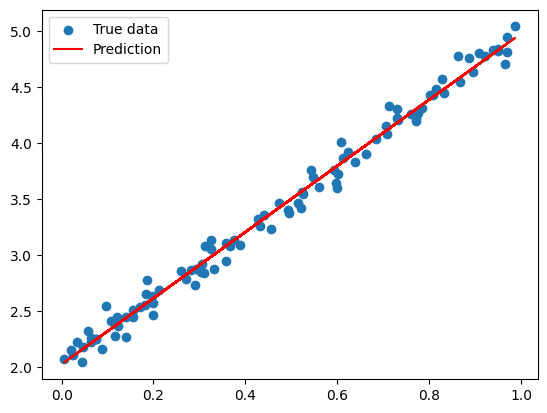

In [76]:
# Tạo dữ liệu giả
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3*X + 2 + np.random.randn(100, 1)*0.1  # y = 3x + 2 + noise

# Train model
model = LinearRegressionScratch(lr=0.1, epochs=1000, log_interval=100)
model.fit(X, y)

# Predict và visualize
import matplotlib.pyplot as plt

y_pred = model.predict(X)
plt.scatter(X, y, label='True data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.legend()
plt.show()
